<a href="https://colab.research.google.com/github/mgovindasamy/Machine-Learning-Examples/blob/master/Google_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install download

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from download import download

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/mgovindasamy/Machine-Learning-Examples/master/Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [6]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [8]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [9]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [10]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [11]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [12]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 15s - loss: 0.0372 - 15s/epoch - 416ms/step
Epoch 2/20
35/35 - 7s - loss: 0.0131 - 7s/epoch - 195ms/step
Epoch 3/20
35/35 - 7s - loss: 0.0094 - 7s/epoch - 194ms/step
Epoch 4/20
35/35 - 7s - loss: 0.0079 - 7s/epoch - 193ms/step
Epoch 5/20
35/35 - 7s - loss: 0.0070 - 7s/epoch - 193ms/step
Epoch 6/20
35/35 - 7s - loss: 0.0069 - 7s/epoch - 193ms/step
Epoch 7/20
35/35 - 7s - loss: 0.0072 - 7s/epoch - 195ms/step
Epoch 8/20
35/35 - 7s - loss: 0.0063 - 7s/epoch - 193ms/step
Epoch 9/20
35/35 - 7s - loss: 0.0064 - 7s/epoch - 196ms/step
Epoch 10/20
35/35 - 7s - loss: 0.0063 - 7s/epoch - 196ms/step
Epoch 11/20
35/35 - 7s - loss: 0.0062 - 7s/epoch - 210ms/step
Epoch 12/20
35/35 - 7s - loss: 0.0063 - 7s/epoch - 192ms/step
Epoch 13/20
35/35 - 7s - loss: 0.0059 - 7s/epoch - 194ms/step
Epoch 14/20
35/35 - 7s - loss: 0.0054 - 7s/epoch - 193ms/step
Epoch 15/20
35/35 - 7s - loss: 0.0054 - 7s/epoch - 193ms/step
Epoch 16/20
35/35 - 7s - loss: 0.0054 - 7s/epoch - 190ms/step
Epoch 17/20
35/

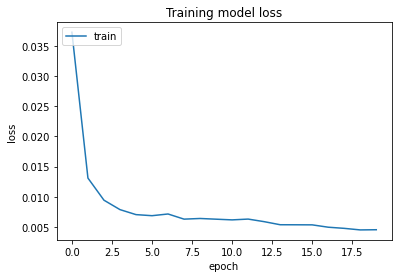

In [13]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [14]:
testData = pd.read_csv('https://raw.githubusercontent.com/mgovindasamy/Machine-Learning-Examples/master/Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [15]:
y_pred = model.predict(X_test)
y_pred

array([[1.121867 ],
       [1.1254525],
       [1.1379336],
       [1.156189 ],
       [1.170023 ],
       [1.1681348],
       [1.1518767],
       [1.1311462],
       [1.1189042],
       [1.1171279],
       [1.111914 ],
       [1.1015447],
       [1.0921944],
       [1.0837173],
       [1.083022 ],
       [1.0892333],
       [1.1095502],
       [1.1402476],
       [1.1739855],
       [1.2059332],
       [1.2157682],
       [1.2074656],
       [1.1815414],
       [1.1481047],
       [1.120328 ],
       [1.1069276],
       [1.1068963],
       [1.1100422],
       [1.1048436],
       [1.0945225],
       [1.0825723],
       [1.0689718],
       [1.0484889],
       [1.0233893],
       [1.0147766],
       [1.0276254],
       [1.0532627],
       [1.0806751],
       [1.1048638],
       [1.1151241],
       [1.1249672],
       [1.1380534],
       [1.1542656],
       [1.1694654],
       [1.1790177],
       [1.1782632],
       [1.1657369],
       [1.1551185],
       [1.1527294],
       [1.1600161],


In [16]:
predicted_price = sc.inverse_transform(y_pred)

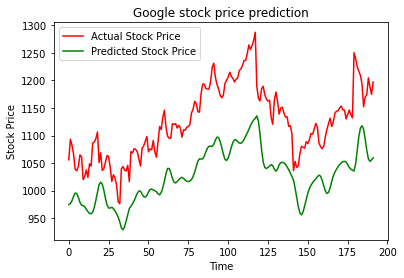

In [17]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()